In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [6]:
# Load datasets
customers = pd.read_csv('C:\\Users\\hp\\Downloads\\Customers.csv')
products = pd.read_csv('C:\\Users\\hp\\Downloads\\Products.csv')
transactions = pd.read_csv('C:\\Users\\hp\\Downloads\\Transactions.csv')

In [7]:
# Merging datasets
df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [8]:
# Aggregating customer-level data
customer_data = df.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

In [9]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['TotalValue', 'Quantity']])

In [10]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)
customer_data['Cluster'] = kmeans.labels_

In [11]:

# Clustering evaluation
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)

In [12]:

print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 0.7212797181816298
Silhouette Score: 0.4497501059000638


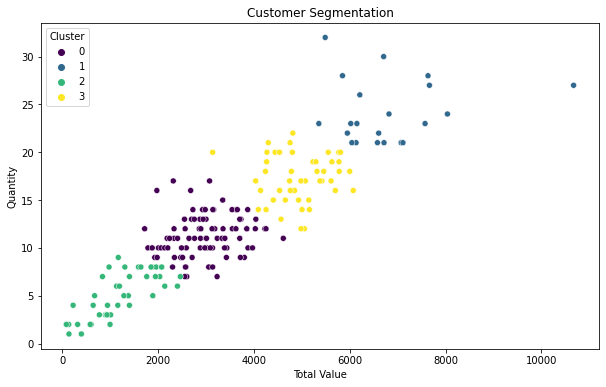

In [15]:
# Visualizing clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=customer_data['TotalValue'], y=customer_data['Quantity'], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()


In [16]:
# Save clustering results
customer_data.to_csv('Customer_Clusters.csv', index=False)